In [148]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [69]:
import missingno as msno

In [70]:
from itertools import islice
import csv

In [71]:
all_data = []
with open('NPL.csv') as data:
    for row in islice(csv.reader(data), 4, None):
        all_data.append(np.array(row))
        
df = pd.DataFrame(all_data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,
1,Aruba,ABW,Bank nonperforming loans to total gross loans (%),FB.AST.NPER.ZS,,,,,,,...,,,,,,,,,,
2,Afghanistan,AFG,Bank nonperforming loans to total gross loans (%),FB.AST.NPER.ZS,,,,,,,...,,49.9013229069412,4.6968178252385,4.95890140377645,4.85228704838131,7.7810908959605,12.0536179767696,11.0743789647307,,
3,Angola,AGO,Bank nonperforming loans to total gross loans (%),FB.AST.NPER.ZS,,,,,,,...,,3.17305056414187,2.01496821504011,4.35011884491608,7.97676918024597,10.1905320738466,10.6112339715733,,,
4,Albania,ALB,Bank nonperforming loans to total gross loans (%),FB.AST.NPER.ZS,,,,,,,...,,,,,,,,,,


In [72]:
df.columns

RangeIndex(start=0, stop=63, step=1)

In [76]:
df = df[[0,1,52,53,54,55,56,57,58,59,60]]
df.columns = df.iloc[0]
df.reindex(df.index.drop(0))

,Country Name,Country Code,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,Aruba,ABW,,,,,,,,,
2,Afghanistan,AFG,,,49.9013229069412,4.6968178252385,4.95890140377645,4.85228704838131,7.7810908959605,12.0536179767696,11.0743789647307
3,Angola,AGO,,,3.17305056414187,2.01496821504011,4.35011884491608,7.97676918024597,10.1905320738466,10.6112339715733,
4,Albania,ALB,,,,,,,,,
5,Andorra,AND,,,,,,,,,
6,Arab World,ARB,,,,,,,,,
7,United Arab Emirates,ARE,,4.17812783392795,5.26698896173513,6.08629581295722,7.12965175228017,6.73555170490737,5.63661628252583,5.19506180189675,5.29846353155647
8,Argentina,ARG,3.10838474371201,3.46682830746549,2.11702287385862,1.39559840620402,1.7345487210843,1.73258243136737,1.990064383351,1.73684181834171,1.83660554376284
9,Armenia,ARM,4.28418920018598,4.86361900244843,3.04141129948019,3.42109151341693,3.66922217057882,4.48533892299217,6.96975042813576,7.94971668385926,6.72411125058909
10,American Samoa,ASM,,,,,,,,,


In [139]:
print(df[df['Country Name'] == 'Lao PDR'])
ASEAN = ['Vietnam', 'Thailand', 'Indonesia', 'Singapore', 'Malaysia', 'Philippines', 'Cambodia', 'Myanmar', 'Lao PDR', 'Brunei Darussalam', 'Timor-Leste']

0   Country Name Country Code 2008 2009 2010 2011 2012 2013 2014 2015 2016
128      Lao PDR          LAO                                             


In [142]:
ASEAN_data = []
print(type(ASEAN_data))

for country in ASEAN:
    ASEAN_data.append(df[df['Country Name'] == country])


ASEAN_df = pd.concat(ASEAN_data)
ASEAN_df

<class 'list'>


,Country Name,Country Code,2008,2009,2010,2011,2012,2013,2014,2015,2016
256,Vietnam,VNM,2.15099820496032,1.79656609383679,2.09259938242,2.79209384764477,3.43791016533393,3.10707263260723,2.93510795966688,2.33849921547478,
232,Thailand,THA,5.59879211346277,5.22061861150825,3.88785784505743,2.93261853635558,2.43018679665442,2.30382713124504,2.305232984074,2.6828308673521,2.98569607594999
105,Indonesia,IDN,3.18971629952475,3.28838738104322,2.53187560750083,2.14412680479297,1.77338188532309,1.68676678017478,2.0668174536709,2.43104248114155,2.89634913035996
207,Singapore,SGP,1.42549965541006,2.03438434173328,1.40635425755787,1.06045560853893,1.04262808908742,0.866941606339939,0.756532862271537,0.92406290512104,1.22253307180161
168,Malaysia,MYS,4.8081809717361,3.62656549307932,3.35402670735158,2.6813903080324,2.01584311320696,1.84914657141208,1.64578545979143,1.60139095442719,1.61189739525395
186,Philippines,PHL,,3.48947494826148,3.38074340505264,2.55545771909276,2.22289481153936,2.44086452225225,2.02468665436274,1.88547820763544,1.7158480997
122,Cambodia,KHM,,,3.14187854787214,2.29438855572053,2.22469008934459,2.30267771735678,1.62133907710753,1.59273995602264,2.13063064162181
159,Myanmar,MMR,,,,,,,,,
128,Lao PDR,LAO,,,,,,,,,
30,Brunei Darussalam,BRN,,9.36467132030001,6.86702975926534,6.03201397638731,5.37615761868223,4.52530200889505,3.85059424062381,0.399835180405115,4.62526313226275


In [145]:
ASEAN_df.dropna()

,Country Name,Country Code,2008,2009,2010,2011,2012,2013,2014,2015,2016
256,Vietnam,VNM,2.15099820496032,1.79656609383679,2.09259938242,2.79209384764477,3.43791016533393,3.10707263260723,2.93510795966688,2.33849921547478,
232,Thailand,THA,5.59879211346277,5.22061861150825,3.88785784505743,2.93261853635558,2.43018679665442,2.30382713124504,2.305232984074,2.6828308673521,2.98569607594999
105,Indonesia,IDN,3.18971629952475,3.28838738104322,2.53187560750083,2.14412680479297,1.77338188532309,1.68676678017478,2.0668174536709,2.43104248114155,2.89634913035996
207,Singapore,SGP,1.42549965541006,2.03438434173328,1.40635425755787,1.06045560853893,1.04262808908742,0.866941606339939,0.756532862271537,0.92406290512104,1.22253307180161
168,Malaysia,MYS,4.8081809717361,3.62656549307932,3.35402670735158,2.6813903080324,2.01584311320696,1.84914657141208,1.64578545979143,1.60139095442719,1.61189739525395
186,Philippines,PHL,,3.48947494826148,3.38074340505264,2.55545771909276,2.22289481153936,2.44086452225225,2.02468665436274,1.88547820763544,1.7158480997
122,Cambodia,KHM,,,3.14187854787214,2.29438855572053,2.22469008934459,2.30267771735678,1.62133907710753,1.59273995602264,2.13063064162181
159,Myanmar,MMR,,,,,,,,,
128,Lao PDR,LAO,,,,,,,,,
30,Brunei Darussalam,BRN,,9.36467132030001,6.86702975926534,6.03201397638731,5.37615761868223,4.52530200889505,3.85059424062381,0.399835180405115,4.62526313226275


In [179]:
ASEAN_T = ASEAN_df.T
ASEAN_T.columns = ASEAN
ASEAN_T

,Vietnam,Thailand,Indonesia,Singapore,Malaysia,Philippines,Cambodia,Myanmar,Lao PDR,Brunei Darussalam,Timor-Leste
0,,,,,,,,,,,
Country Name,Vietnam,Thailand,Indonesia,Singapore,Malaysia,Philippines,Cambodia,Myanmar,Lao PDR,Brunei Darussalam,Timor-Leste
Country Code,VNM,THA,IDN,SGP,MYS,PHL,KHM,MMR,LAO,BRN,TLS
2008,2.15099820496032,5.59879211346277,3.18971629952475,1.42549965541006,4.8081809717361,,,,,,
2009,1.79656609383679,5.22061861150825,3.28838738104322,2.03438434173328,3.62656549307932,3.48947494826148,,,,9.36467132030001,
2010,2.09259938242,3.88785784505743,2.53187560750083,1.40635425755787,3.35402670735158,3.38074340505264,3.14187854787214,,,6.86702975926534,
2011,2.79209384764477,2.93261853635558,2.14412680479297,1.06045560853893,2.6813903080324,2.55545771909276,2.29438855572053,,,6.03201397638731,
2012,3.43791016533393,2.43018679665442,1.77338188532309,1.04262808908742,2.01584311320696,2.22289481153936,2.22469008934459,,,5.37615761868223,
2013,3.10707263260723,2.30382713124504,1.68676678017478,0.866941606339939,1.84914657141208,2.44086452225225,2.30267771735678,,,4.52530200889505,
2014,2.93510795966688,2.305232984074,2.0668174536709,0.756532862271537,1.64578545979143,2.02468665436274,1.62133907710753,,,3.85059424062381,


In [193]:
years = ASEAN_T.index[2:11]

ValueError: x and y must have same first dimension, but have shapes (9,) and (11,)

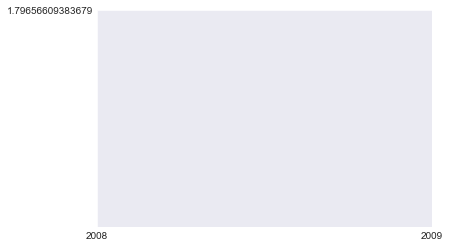

In [194]:
plt.plot(years,'Vietnam',data = ASEAN_T)